#  Machine Learning - Predictive Modeling 

## Sales Forecasting Using Using Prophet Model

## What will our monthly sales look like over the next two years based on historical purchasing patterns?

### 1. Overview

Accurate sales forecasting is the backbone of strategic business planning, especially in a fast-changing market. In this project, we leverage Facebook’s open-source Prophet forecasting model to predict monthly sales trends over the next two years using historical sales data. By capturing seasonal effects and trends, this model offers reliable foresight into future performance, equipping stakeholders with actionable insights for smarter decision-making.

### 2. Goal 

- Forecast monthly sales revenue for the next 24 months using historical purchase patterns.
- Leverage Prophet’s time series forecasting capabilities to model seasonality and trends effectively.
- Support strategic functions like inventory planning, budgeting, and resource allocation.
- Visualize both historical and forecasted sales in a clear, data-driven plot.

### 3. Business Challenge

- Lack of visibility into future sales patterns, affecting budgeting and procurement cycles.
- Difficulty in identifying seasonal trends and demand fluctuations across months.
- Inability to anticipate revenue dips or surges, leading to reactive decision-making.
- The need for a scalable, accurate forecasting method that’s both interpretable and fast to deploy.

### 4.  Methodology

- Data Aggregation: Resample and prepare historical order data to monthly total sales for modeling
- Model Training: Fit the Prophet model on historical monthly sales data to learn trends and seasonality.
- Forecasting: Predict future sales for the next 24 months (2 years) using Prophet’s make_future_dataframe().
- Visualization: Combine observed and predicted sales into a visually intuitive chart with legends and axis formatting.
- Interpretation: Translate insights into recommendations for inventory management, marketing strategy, and financial planning.

### Import necessary libraries

In [23]:
import pandas as pd
import os
import glob

In [25]:
# Skip Blank Rows if present in the dataset

df = pd.read_csv(r'C:\Monthly_Sales\all_data.csv', skip_blank_lines=True)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
0,175667,iPhone,1,700.0,04/24/24 19:12,"135 Meadow St, Boston, MA 02215"
1,175668,AA Batteries (4-pack),1,5.84,04/20/24 13:45,"592 4th St, San Francisco, CA 94016"
2,175669,AA Batteries (4-pack),1,5.84,04/28/24 09:17,"632 Park St, Dallas, TX 75001"
3,175670,AA Batteries (4-pack),2,5.84,04/23/24 14:06,"131 Pine St, San Francisco, CA 94016"
4,175671,Samsung Odyssey Monitor,1,409.99,04/23/24 12:13,"836 Forest St, Boston, MA 02215"


## Data Cleaning Process

Thoroughly clean and standardize the data to eliminate errors, ensure consistency, and build a solid foundation for meaningful insights.

### Find and remove rows with NaN values

In [29]:
df.isna().sum()

Order ID            23296
Product Name        23296
Units Purchased     23298
Unit Price          23298
Order Date          23299
Delivery Address    23300
dtype: int64

In [31]:
# If Nan value is present in Order ID and Unit Purchased, it will be impossible to manipulate the data.
# Therefore, drop Nan values in Order ID and Units Purchased.

df.dropna(subset=['Order ID', 'Units Purchased'], inplace=True)

# Check if Nan value is present
df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     0
Unit Price          0
Order Date          1
Delivery Address    2
dtype: int64

In [14]:
# Further check if any NaN values or blank rows are present

blank_rows_na = df[df.isnull().any(axis=1)]
blank_rows_na

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
2195228,Charging Cable,1,14.95,05/24/24 07:04,"852 Hickory St, San Francisco, CA 94016",NaN


### Find and remove rows with duplicate values

In [16]:
# Find duplicate values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6211112     True
6211113     True
6211114     True
6211115     True
6211116     True
Length: 6194988, dtype: bool

In [17]:
# Check again for duplicated values

df.drop_duplicates(inplace = True)

# Check again for duplicated values
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
172527     False
172528     False
172529     False
172530     False
2195228    False
Length: 171543, dtype: bool

### Verify and fix incorrect data types in the dataset

In [19]:
# check for data types

df.dtypes

Order ID            object
Product Name        object
Units Purchased     object
Unit Price          object
Order Date          object
Delivery Address    object
dtype: object

### Fix incorrect data types

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df['Units Purchased'] = pd. to_numeric(df['Units Purchased'], errors='coerce')

df['Unit Price'] = pd. to_numeric(df['Unit Price'], errors='coerce')

In [22]:
# Verify the presence of NaN values remaining in the columns as a result of using errors='coerce' during data conversion.

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     1
Unit Price          2
Order Date          2
Delivery Address    1
dtype: int64

In [23]:
df = df.dropna()

### Change the data type to optimize memory usage (Optional)

In [25]:
df['Order ID'] = pd.to_numeric(df['Order ID'], downcast='integer') 
df['Product Name'] = df['Product Name'].astype('category')  
df['Units Purchased'] = df['Units Purchased']. astype('int8') 
df['Unit Price'] = pd.to_numeric(df['Unit Price'], downcast='float')   
df['Delivery Address'] = df['Delivery Address'].astype('category') 

## Expand the dataset with supplementary columns

In [27]:
# Add Month and Year 
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Year
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,2024
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,2024
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,2024
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,2024
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,2024
...,...,...,...,...,...,...,...,...
172526,248376,Apple Airpods Headphones,1,150.00000,2024-09-24 12:23:00,"517 Lincoln St, Portland, OR 97035",9,2024
172527,248377,Apple Airpods Headphones,1,150.00000,2024-09-08 13:44:00,"189 West St, Los Angeles, CA 90001",9,2024
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,2024
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,2024


In [28]:
# Add Total Sales column

df['Total Sales'] = df['Units Purchased'] * df['Unit Price']
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Year,Total Sales
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,2024,700.00000
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,2024,5.84000
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,2024,5.84000
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,2024,11.68000
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,2024,409.98999


### Format Unit Price and Total Sales to 2 decimal places

In [30]:
df['Unit Price'] = df['Unit Price'].apply(lambda x: "%.2f" % x)

df['Total Sales'] = df['Total Sales'].apply(lambda x: "%.2f" % x)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Year,Total Sales
0,175667,iPhone,1,700.00,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,2024,700.00
1,175668,AA Batteries (4-pack),1,5.84,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,2024,5.84
2,175669,AA Batteries (4-pack),1,5.84,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,2024,5.84
3,175670,AA Batteries (4-pack),2,5.84,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,2024,11.68
4,175671,Samsung Odyssey Monitor,1,409.99,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,2024,409.99


In [31]:
# Convert from string to numeric

df['Unit Price'] = pd.to_numeric(df['Unit Price'])
df['Total Sales'] = pd.to_numeric(df['Total Sales'])

In [32]:
df.dtypes

Order ID                     int32
Product Name              category
Units Purchased               int8
Unit Price                 float64
Order Date          datetime64[ns]
Delivery Address          category
Month                        int32
Year                         int32
Total Sales                float64
dtype: object

### Organize Data by Order Date Chronologically and Reindex

In [34]:
df = df.sort_values(by = 'Order Date')

df = df.reset_index(drop=True)
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Year,Total Sales
0,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,2024,4.99
1,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,2024,400.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,2024,4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,2024,600.00
4,156535,Lightning Charging Cable,2,14.95,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,2024,29.90
...,...,...,...,...,...,...,...,...,...
171536,297748,USB-C Charging Cable,2,11.95,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,2025,23.90
171537,284606,Bose SoundSport Headphones,1,99.99,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,2025,99.99
171538,302330,AA Batteries (4-pack),1,5.84,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,2025,5.84
171539,284711,AA Batteries (4-pack),1,5.84,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,2025,5.84


## Plot Monthly Sales (Next 2 Years) Forecasting Using Prophet Model

19:03:27 - cmdstanpy - INFO - Chain [1] start processing
19:03:27 - cmdstanpy - INFO - Chain [1] done processing


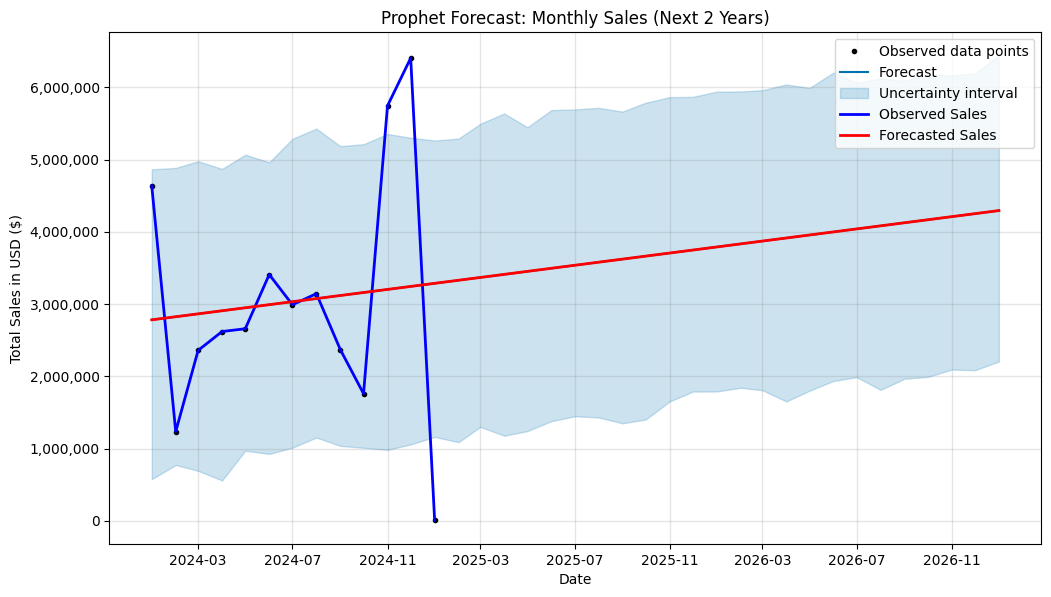

,ds,yhat,yhat_lower,yhat_upper
13,2025-02-01,3.329149e+06,1.088019e+06,5.290051e+06
14,2025-03-01,3.367773e+06,1.300173e+06,5.494404e+06
15,2025-04-01,3.410535e+06,1.177887e+06,5.636999e+06
16,2025-05-01,3.451918e+06,1.241858e+06,5.446867e+06
17,2025-06-01,3.494680e+06,1.378806e+06,5.684133e+06
18,2025-07-01,3.536063e+06,1.446880e+06,5.692709e+06
19,2025-08-01,3.578825e+06,1.430414e+06,5.715813e+06
20,2025-09-01,3.621588e+06,1.349218e+06,5.663395e+06
21,2025-10-01,3.662971e+06,1.401901e+06,5.786322e+06
22,2025-11-01,3.705733e+06,1.651953e+06,5.863017e+06


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from prophet import Prophet

# Deep copy to avoid modifying the original DataFrame (df)
df_prophet = df.copy(deep=True)

# Data preparation
monthly_sales = df_prophet.resample('MS', on='Order Date')['Total Sales'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']

# Fit Prophet model
model = Prophet()
model.fit(monthly_sales)

# Forecast for next 24 months (2 years)
future = model.make_future_dataframe(periods=24, freq='MS')
forecast = model.predict(future)
fig = model.plot(forecast)

# Connect observed data points (historical sales)  
plt.plot(monthly_sales['ds'], monthly_sales['y'], color='blue', linewidth=2, label='Observed Sales')

# Overlay forecast line
plt.plot(forecast['ds'], forecast['yhat'], color='red', linewidth=2, label='Forecasted Sales')

plt.title('Prophet Forecast: Monthly Sales (Next 2 Years)')
plt.xlabel('Date')
plt.ylabel('Total Sales in USD ($)')
plt.grid(True)

# Format Y-axis to numeric (non-scientific)
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.show()

# Forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

## Key Insights

1. Consistent Upward Sales Trend: Forecasted monthly sales exhibit a steady upward trajectory, reflecting strong positive momentum in overall business performance.
   
2. Average Monthly Growth: The model predicts an average monthly increase of approximately
50K, indicating healthy organic growth and potentially rising customer demand or market expansion.


3. Seasonality Detected: While Prophet accounts for seasonal patterns, the confidence intervals show noticeable fluctuations around key months—likely due to holidays or promotion-driven spikes (e.g., November–December).

   
4. Wide Confidence Intervals: The forecast shows broad prediction intervals in the near term (e.g., February–April 2025), indicating short-term volatility or uncertainty. These intervals narrow over time as more data becomes available.

   
5. Strong Lower Bound: Even under conservative scenarios (lower bound estimates), monthly sales remain well above $1M, providing a reliable baseline for financial planning and inventory decisions.

##  Strategic Recommendations

1. Prepare for Sustained Growth: With forecasts indicating steady growth, businesses should scale operational capacity, workforce planning, and inventory management accordingly.

2. Inventory Optimization: Align inventory restocking strategies with predicted sales peaks (e.g., Q4 months) to maximize revenue and reduce stockouts or overstocking risks.

3. Plan Promotions Around High-Variance Months: Use confidence interval analysis to identify periods with high sales variability (e.g., Nov-Dec) and leverage them for targeted marketing or discount campaigns.

4. Integrate with Budget Planning: Use forecast figures to drive revenue targets, set realistic financial KPIs, and inform executive-level decision-making.

5. Risk Mitigation: Develop contingency plans for scenarios near the lower bound forecasts, especially in months with wider intervals, to ensure financial resilience.
